In [5]:
from PIL import Image
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [95]:
from math import floor

ImportError: cannot import name 'round'

In [257]:
image = Image.open("pictures/picture3.jpg")

In [258]:
def change_to_halftone(image):
    width, height = image.size
    newImage = Image.new('P', (width, height))
    for x in range(width):
        for y in range(height):
            color = image.getpixel((x,y))
            bright = floor(0.3 * color[0] + 0.59 * color[1] +  0.11 *color[2])
            newImage.putpixel((x, y), bright)
    return newImage

In [259]:
arr = np.zeros(256, dtype = 'uint32')

In [260]:
new_image = change_to_halftone(image)


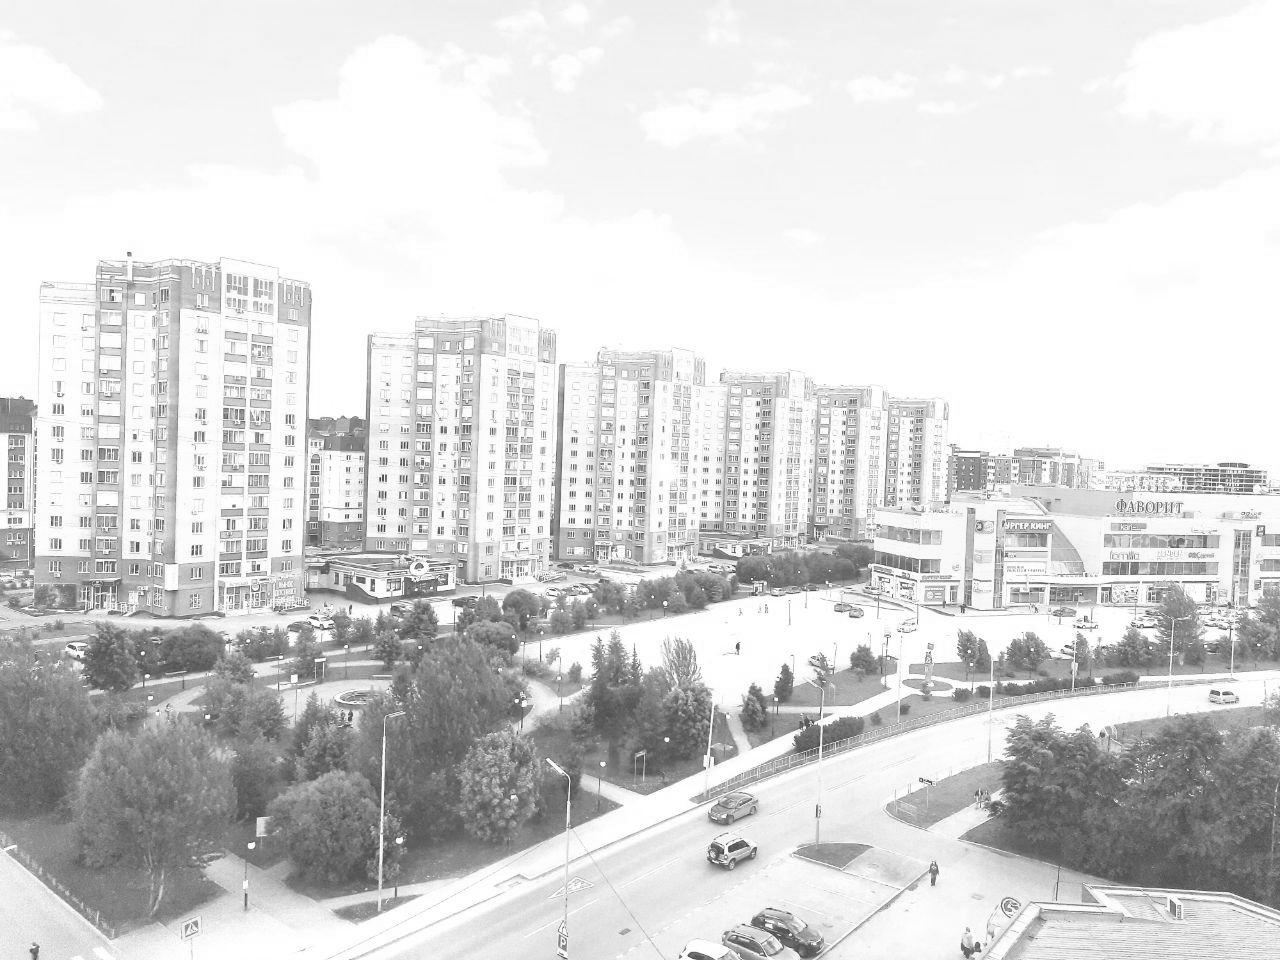

In [261]:
new_image

In [262]:
new_image.save("pictures/ht_picture3.bmp")

In [263]:
width, height = new_image.size

In [264]:
for x in range(width):
    for y in range(height):
        arr[new_image.getpixel((x,y))] += 1

In [265]:
x_values = range(256)

In [266]:
y_values = arr

In [267]:
rel_arr = np.zeros(256)

In [268]:
for i in range(256):
    rel_arr[i] = arr[i]

In [269]:
for i in range(256):
    rel_arr[i] /= (width * height)

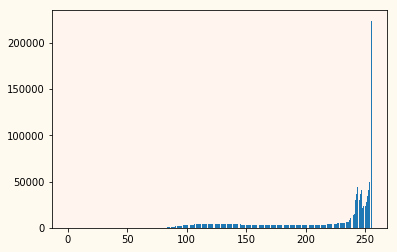

In [270]:
fig, ax = plt.subplots()

ax.bar(x_values, y_values)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')


plt.show()

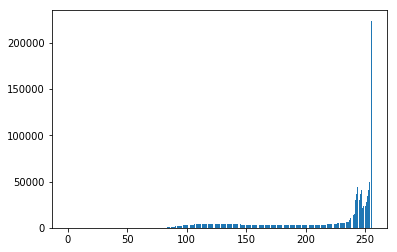

In [271]:
plt.bar(x_values, y_values)
plt.savefig("pictures/hist3.png")

In [272]:
for i in range(1, 256):
    rel_arr[i] = rel_arr[i-1] + rel_arr[i]

In [273]:
arr2 = np.zeros(256, dtype = 'uint32')

In [274]:
for i in range(256):
    arr2[floor(255 * rel_arr[i])] = arr[i]

In [275]:
for x in range(width):
    for y in range(height):
        new_image.putpixel((x,y), floor(255 * rel_arr[new_image.getpixel((x,y))]))

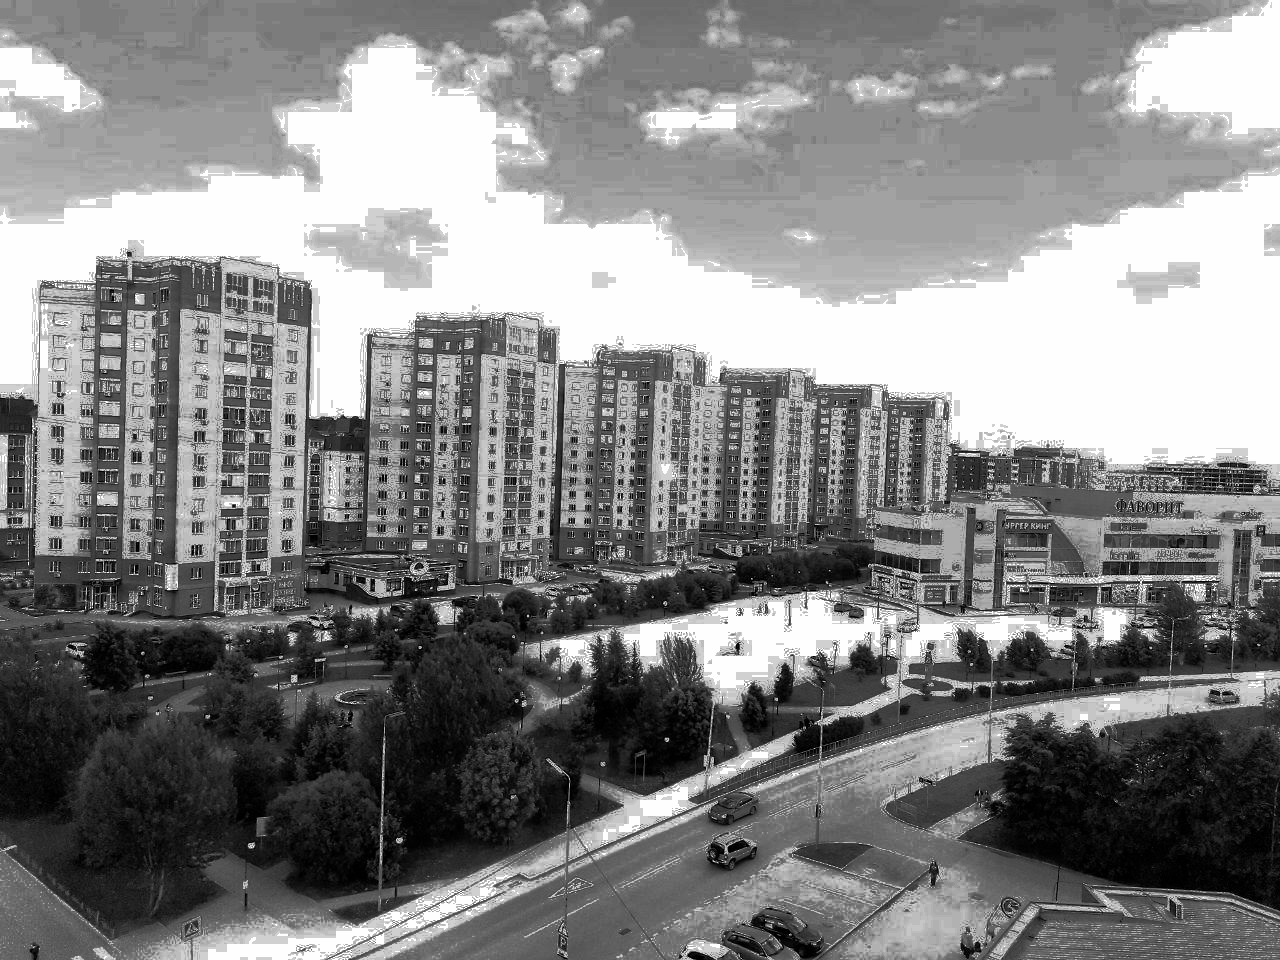

In [276]:
new_image

In [277]:
new_image.save("pictures/r_picture3.bmp")

In [278]:
x_values = range(256)
y_values = arr2

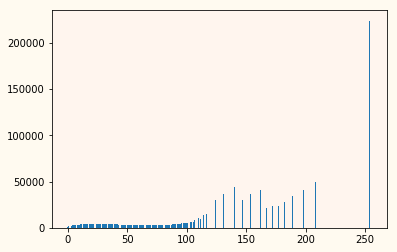

In [279]:
fig, ax = plt.subplots()

ax.bar(x_values, y_values)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')


plt.show()

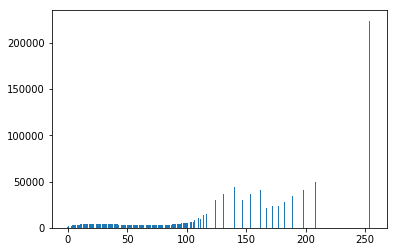

In [280]:
plt.bar(x_values, y_values)
plt.savefig("pictures/r_hist3.png")